In [1]:
## Beer Data Analysis Phase
## Main Aim is to understand more about the from beer dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset=pd.read_csv('C:/Users/sesa687360/OneDrive - Schneider Electric/beer_reviews.csv')
dataset

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


In [4]:
dataset.isnull().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [5]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>0]
print(features_with_na)

['brewery_name', 'review_profilename', 'beer_abv']


In [6]:
## 2- step print the feature name and the percentage of missing values
#here we pass dataset becouse na value is zero 
for feature in dataset:
    missing_percentage = np.round(dataset[feature].isnull().mean() * 100, 3) #4means 4 decimal position
    print(f"{feature}: {missing_percentage}% missing values")

brewery_id: 0.0% missing values
brewery_name: 0.001% missing values
review_time: 0.0% missing values
review_overall: 0.0% missing values
review_aroma: 0.0% missing values
review_appearance: 0.0% missing values
review_profilename: 0.022% missing values
beer_style: 0.0% missing values
review_palate: 0.0% missing values
review_taste: 0.0% missing values
beer_name: 0.0% missing values
beer_abv: 4.272% missing values
beer_beerid: 0.0% missing values


In [7]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
#here 'O' means some string---so display everyhing except string u know

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  9


,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
0,10325,1234817823,1.5,2.0,2.5,1.5,1.5,5.0,47986
1,10325,1235915097,3.0,2.5,3.0,3.0,3.0,6.2,48213
2,10325,1235916604,3.0,2.5,3.0,3.0,3.0,6.5,48215
3,10325,1234725145,3.0,3.0,3.5,2.5,3.0,5.0,47969
4,1075,1293735206,4.0,4.5,4.0,4.0,4.5,7.7,64883


C:\Users\sesa687360\AppData\Local\Temp\ipykernel_16572\3527921764.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column] ,kde=True, hist=True)


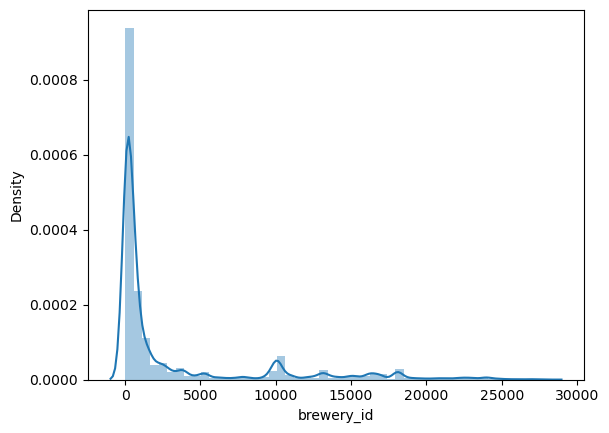

C:\Users\sesa687360\AppData\Local\Temp\ipykernel_16572\3527921764.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column] ,kde=True, hist=True)


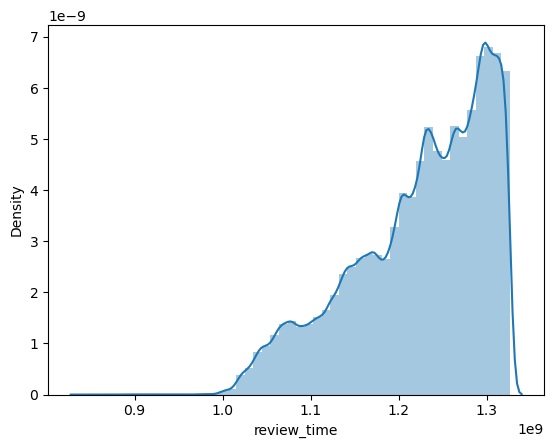

C:\Users\sesa687360\AppData\Local\Temp\ipykernel_16572\3527921764.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column] ,kde=True, hist=True)


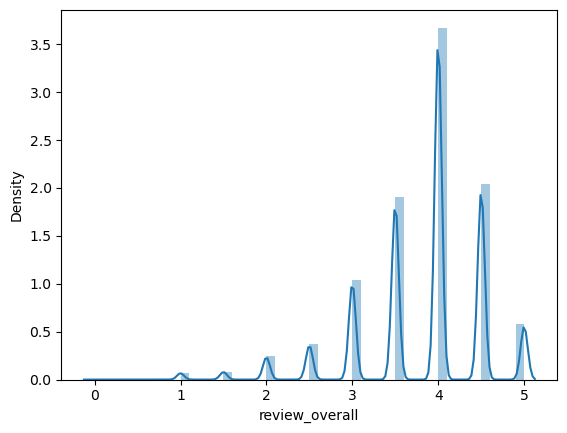

C:\Users\sesa687360\AppData\Local\Temp\ipykernel_16572\3527921764.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column] ,kde=True, hist=True)


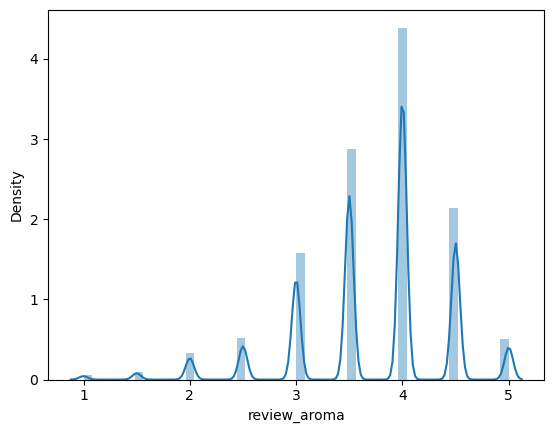

C:\Users\sesa687360\AppData\Local\Temp\ipykernel_16572\3527921764.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column] ,kde=True, hist=True)


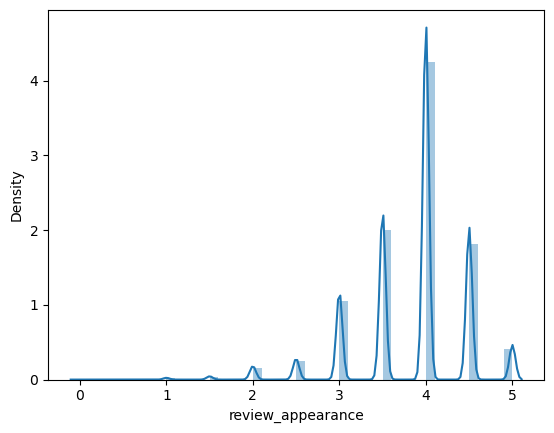

C:\Users\sesa687360\AppData\Local\Temp\ipykernel_16572\3527921764.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column] ,kde=True, hist=True)


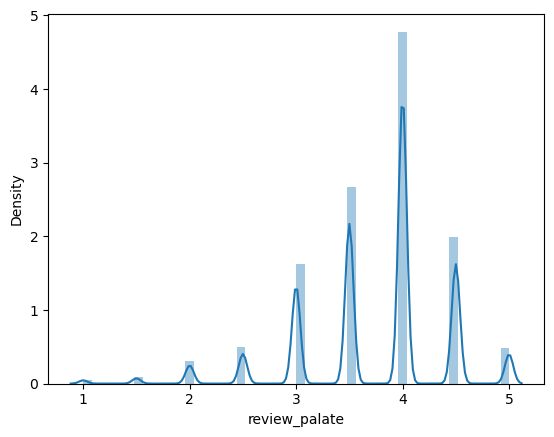

C:\Users\sesa687360\AppData\Local\Temp\ipykernel_16572\3527921764.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column] ,kde=True, hist=True)


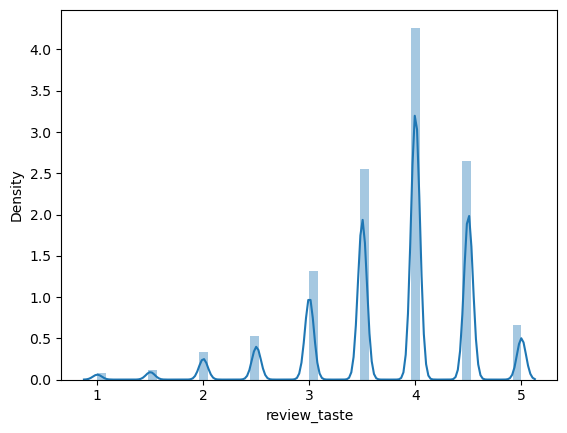

C:\Users\sesa687360\AppData\Local\Temp\ipykernel_16572\3527921764.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column] ,kde=True, hist=True)


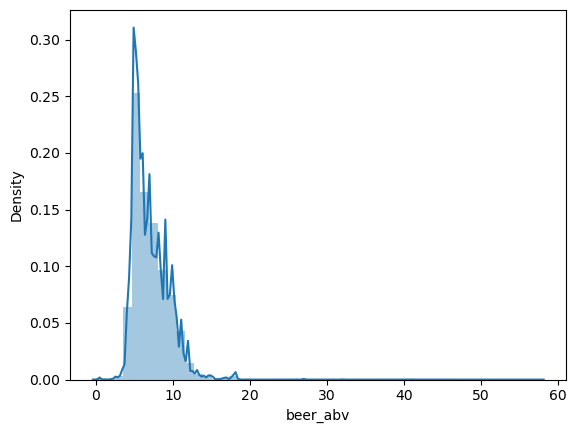

C:\Users\sesa687360\AppData\Local\Temp\ipykernel_16572\3527921764.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column] ,kde=True, hist=True)


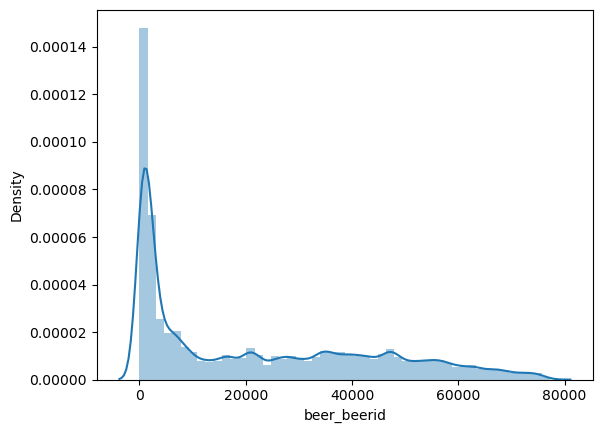

In [9]:
#histogram
import seaborn as sns
import matplotlib.pyplot as plt


# Create distribution plots for each numerical column
for  column in numerical_features:
    sns.distplot(dataset[column] ,kde=True, hist=True)
    plt.show()

In [4]:
# Assuming your DataFrame is named 'df'
#dataset['brewery_name'].fillna('Unknown', inplace=True)

In [11]:
#this one for converting column (review_time) into datetime format since its not in normal format
import pandas as pd
import datetime

dataset['review_time'] = pd.to_datetime(dataset['review_time'], unit='s')
dataset['review_time'] = dataset['review_time'].dt.strftime('%m/%d/%Y %H:%M:%S')
dataset


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,02/16/2009 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,03/01/2009 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,03/01/2009 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,02/15/2009 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,12/30/2010 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,11/05/2006 00:01:32,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,10/17/2006 01:29:26,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,10/13/2006 01:21:53,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,10/05/2006 04:37:24,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


In [13]:
#here i applied median becouse from above diagram we can see its not normally distrubuted so outlier will be there
 
dataset['beer_abv'] = dataset['beer_abv'].fillna(dataset['beer_abv'].median())

In [ ]:
#A correlation matrix is drawn to understand the relationships between multiple variables in a dataset
#from correlation matrix i got to know how its correlated also got to know about which data is important to make analysis

C:\Users\sesa687360\AppData\Local\Temp\ipykernel_21804\1386143632.py:6: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = dataset.corrwith(dataset['review_overall'])
C:\Users\sesa687360\AppData\Local\Temp\ipykernel_21804\1386143632.py:18: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  df_top_features = dataset[top_features.index | ['review_overall']]


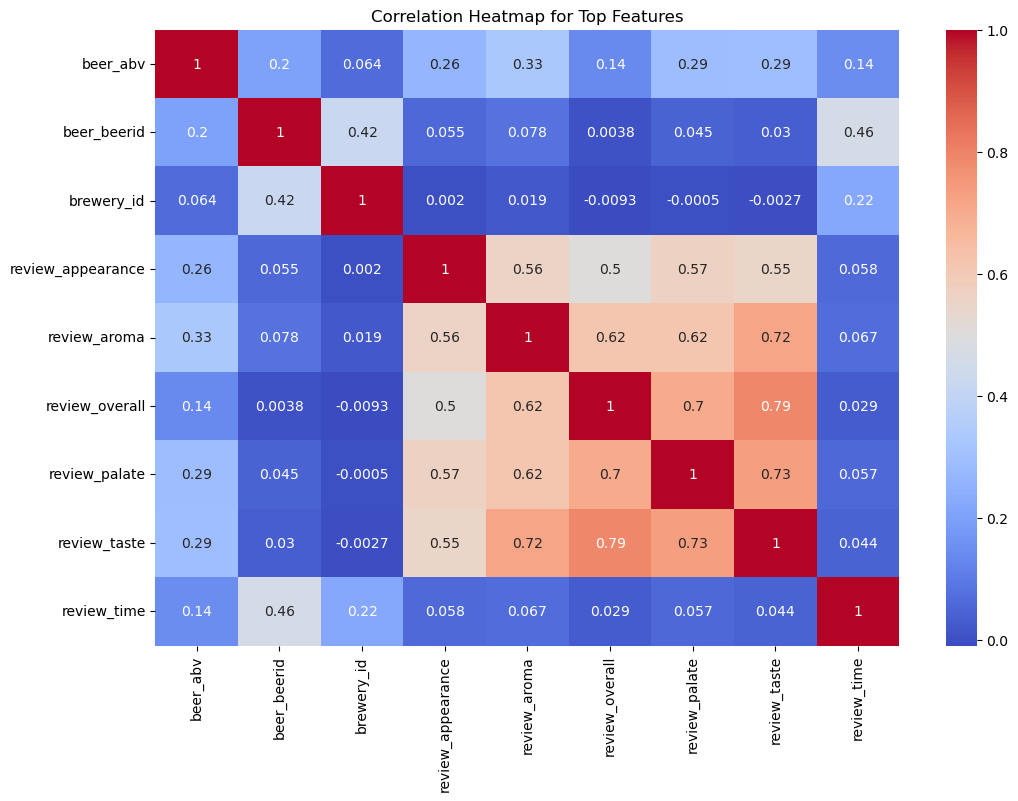

In [3]:
#A correlation matrix is drawn to understand the relationships between multiple variables in a dataset
#from correlation matrix i got to know how its correlated also got to know about which data is important to make analysis

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the correlation between features and the target variable
correlation_with_target = dataset.corrwith(dataset['review_overall'])

# Sort the features based on their absolute correlation with the target variable
sorted_features = correlation_with_target.abs().sort_values(ascending=False)

# Define the number of top features you want to keep
num_top_features_to_keep = 10  # You can adjust this as needed

# Select the top features
top_features = sorted_features.head(num_top_features_to_keep)

# Create a new DataFrame with only the top features and the target variable
df_top_features = dataset[top_features.index | ['review_overall']]

# Create a heatmap for the top features
plt.figure(figsize=(12, 8))
heatmap_data = sns.heatmap(data=df_top_features.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for Top  Features")

plt.show()